### OUTLIER 처리 방법

- Grayscale 픽셀  ->  150 이상일 경우, 수집

- 첫 번째 좌표의 속도  ->  최소값 : 30, 최댓값 : 120

- 나머지 좌표의 속도  ->  값이 30 미만 또는 120 초과할 경우, 직전 속도로 대체

In [1]:
# -*- coding:utf-8 -*-

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import plotly.offline as plyo

In [3]:
import chart_studio
import plotly.graph_objects as go

chart_studio.tools.set_credentials_file(username='dorosi', api_key='L2x3IMvhlfHqaeBCfV0z')

## convert video to image

In [58]:
# read video list

path = 'D:/kist_storage/Ultrasound Imaging Processing/video'
file_list = os.listdir(path)
# os.makedirs(path)

file_list.sort()
file_list = file_list[46:47]
file_list

['51.avi']

In [ ]:
for i in file_list:
    
    video_file =  "D:/kist_storage/Ultrasound Imaging Processing/video/" + i
    
    shuttleVideo = cv2.VideoCapture(video_file)
    
    num = ''.join( x for x in i if x not in ".avi")
    
    
    #path = "D:/kist_storage/Ultrasound Imaging Processing/all subjects_data/"+num
    path = "D:/kist_storage/Ultrasound Imaging Processing/frameImages/"+num
    # os.makedirs(path)
    
    img_gray_all = []
    
    c1 = 17
    
    while(shuttleVideo.isOpened()):
    
        hasFrame, img_frame = shuttleVideo.read()
    
    
        if not hasFrame:
            break
             
        if (int(shuttleVideo.get(1) % 17 == 0)):
                
            img_path = path + '/' + '%d.jpg' %c1
            cv2.imwrite(img_path, img_frame)
        
            # 흑백변환
            img = cv2.imread(img_path)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(img_path, img_gray)
            img_gray_all.append(img_gray)
                
        
            c1 += 17
    
    
       
        
        
    np.save('D:/kist_storage/Ultrasound Imaging Processing/grayscale_array/%s_grayscale_array.npy' %num, img_gray_all)

In [26]:
for i in file_list:
    
    video_file =  "D:/kist_storage/Ultrasound Imaging Processing/video/" + i
    
    shuttleVideo = cv2.VideoCapture(video_file)
    
    num = ''.join( x for x in i if x not in ".avi")
    
    
    #path = "D:/kist_storage/Ultrasound Imaging Processing/all subjects_data/"+num
    path = "D:/kist_storage/Ultrasound Imaging Processing/frameImages/"+num
    # os.makedirs(path)
    
    img_gray_all = []
    
    c1 = 120
    c2 = 118
    c3 = 26
    
    while(shuttleVideo.isOpened()):
    
        hasFrame, img_frame = shuttleVideo.read()
    
    
        if not hasFrame:
            break
             
       
        # 프레임 120개씩
        if num == "32":
            if (int(shuttleVideo.get(1) % 120 == 0)):
                
                img_path = path + '/' + '%d.jpg' %c1
                cv2.imwrite(img_path, img_frame)
        
                # 흑백변환
                img = cv2.imread(img_path)
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                cv2.imwrite(img_path, img_gray)
                img_gray_all.append(img_gray)
                
        
                c1 += 120
                
                
        # 프레임 118개씩
        if num == "33":
            if (int(shuttleVideo.get(1) % 118 == 0)):
                
                img_path = path + '/' + '%d.jpg' %c2
                cv2.imwrite(img_path, img_frame)
        
                # 흑백변환
                img = cv2.imread(img_path)
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                cv2.imwrite(img_path, img_gray)
                img_gray_all.append(img_gray)
                
        
                c2 += 118
            
            
            
        # 프레임 26개씩
        else:
            if (int(shuttleVideo.get(1) % 26 == 0)):
                
                img_path = path + '/' + '%d.jpg' %c3
                cv2.imwrite(img_path, img_frame)
        
                # 흑백변환
                img = cv2.imread(img_path)
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                cv2.imwrite(img_path, img_gray)
                img_gray_all.append(img_gray)
                
        
                c3 += 26
        
        
    np.save('D:/kist_storage/Ultrasound Imaging Processing/grayscale_array/%s_grayscale_array.npy' %num, img_gray_all)

KeyboardInterrupt: 

# video

## graph extraction

In [156]:
## 29분

def graph_array(video_num, frames_path):
    
    frame_list = os.listdir(frames_path)
    if video_num == "03":
        start_num = 121
    else:
        start_num = 17
    
    img_gray = np.load('D:/kist_storage/Ultrasound Imaging Processing/grayscale_array/%s_grayscale_array.npy' %video_num)
    
    graph_all = []
        
    graph = []
    for i in range(975):   # (1276-301)
        graph.append(0)
        
    for k in range(len(img_gray)):
        for j in range(301, 1276):
            for i in range(470, 764):
                if img_gray[k][i][j] > 150:
                    graph[j-301] = (764-i)*(100/(764-556))
                    break          
            
                
        if graph[0] < 10:
            graph[0] = 10
        elif graph[0] > 70:
            graph[0] = 70
        
        for i in range(1, len(graph)):
            if graph[i] < 10:
                graph[i] = graph[i-1]
            elif graph[i] > 70:
                graph[i] = graph[i-1]
        
        #print(k)  
        graph_all.extend(graph)
        
        
        # x 좌표
        x_axis = []
        
    
        for x in range(len(graph_all)) :       # int(len(graph_all)-(len(graph_all)*4-(29*60))/4)*975
            seconds = x * (4/975)
            x_axis.append(seconds)
    
        start = int(len(graph_all)-len(x_axis))         # 4초 = 프레임 1장 = 975px
                                                        # 17분 = 프레임 255장 = 248625px
    
        # y 좌표
        y_axis = graph_all[start:]
        
        
    np.save('D:/kist_storage/Ultrasound Imaging Processing/rawdata_array_all/%s_rawdata_array_all.npy' %video_num, graph_all)
    np.save('D:/kist_storage/Ultrasound Imaging Processing/rawdata_xarray/%s_rawdata_xarray.npy' %video_num, x_axis)       # 모두 동일
    np.save('D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray/%s_rawdata_yarray.npy' %video_num, y_axis)       # 배열 저장 (17분)

In [157]:
path1 = "D:/kist_storage/Ultrasound Imaging Processing/frameImages"
file_list = os.listdir(path1)
file_list = file_list[0:1]
file_list

['01']

In [158]:
path1 = "D:/kist_storage/Ultrasound Imaging Processing/frameImages"
file_list = os.listdir(path1)
file_list = file_list[0:1]
file_list

for i in file_list:
    
    path2 = path1 + "/" + i
    
    graph_array(i, path2)

In [33]:
## 25분

def graph_array(video_num, frames_path):
    
    frame_list = os.listdir(frames_path)
    if video_num == "03":
        start_num = 121
    else:
        start_num = 17
    
    img_gray = np.load('D:/kist_storage/Ultrasound Imaging Processing/grayscale_array/%s_grayscale_array.npy' %video_num)
    
    graph_all = []
        
    graph = []
    for i in range(975):   # (1276-301)
        graph.append(0)
        
    for k in range(len(img_gray)):
        for j in range(301, 1276):
            for i in range(470, 764):
                if img_gray[k][i][j] > 150:
                    graph[j-301] = (764-i)*(100/(764-556))
                    break          
            
                
        if graph[0] < 20:
            graph[0] = 20
        elif graph[0] > 70:
            graph[0] = 70
        
        for i in range(1, len(graph)):
            if graph[i] < 20:
                graph[i] = graph[i-1]
            elif graph[i] > 70:
                graph[i] = graph[i-1]
        
        #print(k)  
        graph_all.extend(graph)
        
        
        # x 좌표
        x_axis = []
        
    
        for x in range(int(len(graph_all)-(len(graph_all)*4-(25*60))/4)*975) :       # int(len(graph_all)-(len(graph_all)*4-(25*60))/4)*975
            seconds = x * (4/975)
            x_axis.append(seconds)
    
        start = int(len(graph_all)-len(x_axis)-(6*975))         # 4초 = 프레임 1장 = 975px
                                                                 # 17분 = 프레임 255장 = 248625px
    
        # y 좌표
        y_axis = graph_all[start:]
        
        
    np.save('D:/kist_storage/Ultrasound Imaging Processing/rawdata_array_all/%s_rawdata_array_all.npy' %video_num, graph_all)
    np.save('D:/kist_storage/Ultrasound Imaging Processing/rawdata_xarray/%s_rawdata_xarray.npy' %video_num, x_axis)       # 모두 동일
    np.save('D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray/%s_rawdata_yarray.npy' %video_num, y_axis)       # 배열 저장 (17분)

In [34]:
path1 = "D:/kist_storage/Ultrasound Imaging Processing/frameImages"
file_list = os.listdir(path1)
file_list = file_list[10:11]
file_list

['12']

In [35]:
path1 = "D:/kist_storage/Ultrasound Imaging Processing/frameImages"
file_list = os.listdir(path1)
file_list = file_list[10:11]
file_list

for i in file_list:
    
    path2 = path1 + "/" + i
    
    graph_array(i, path2)


In [42]:
def graph_array(video_num, frames_path):
    
    frame_list = os.listdir(frames_path)
    if video_num == "03":
        start_num = 121
    else:
        start_num = 17
    
    img_gray = np.load('D:/kist_storage/Ultrasound Imaging Processing/grayscale_array/%s_grayscale_array.npy' %video_num)
    
    graph_all = []
        
    graph = []
    for i in range(975):   # (1276-301)
        graph.append(0)
        
    for k in range(len(img_gray)):
        for j in range(301, 1276):
            for i in range(470, 764):
                if img_gray[k][i][j] > 150:
                    graph[j-301] = (764-i)*(100/(764-556))
                    break          
            
                
        if graph[0] < 10:
            graph[0] = 10
        elif graph[0] > 80:
            graph[0] = 80
        
        for i in range(1, len(graph)):
            if graph[i] < 10:
                graph[i] = graph[i-1]
            elif graph[i] > 80:
                graph[i] = graph[i-1]
        
        #print(k)  
        graph_all.extend(graph)
        
        
        # x 좌표
        x_axis = []
    
        for x in range(int(len(graph_all)-(len(graph_all)*4-(17*60))/4)*975) :
            seconds = x * (4/975)
            x_axis.append(seconds)
    
        start = int(len(graph_all)-len(x_axis))          # 4초 = 프레임 1장 = 975px
                                                         # 17분 = 프레임 255장 = 248625px
    
        # y 좌표
        y_axis = graph_all[start:]
        
        
    np.save('D:/kist_storage/Ultrasound Imaging Processing/rawdata_array_all/%s_rawdata_array_all.npy' %video_num, graph_all)
    np.save('D:/kist_storage/Ultrasound Imaging Processing/rawdata_xarray/%s_rawdata_xarray.npy' %video_num, x_axis)       # 모두 동일
    np.save('D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray/%s_rawdata_yarray.npy' %video_num, y_axis)       # 배열 저장 (17분)

In [51]:
y_array = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray/39_rawdata_yarray.npy')
y_array[:30]

array([80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80.,
       80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80.,
       80., 80., 80., 80.])

In [44]:
path1 = "D:/kist_storage/Ultrasound Imaging Processing/frameImages"
file_list = os.listdir(path1)
file_list = file_list[35:]
file_list

for i in file_list:
    
    path2 = path1 + "/" + i
    
    graph_array(i, path2)


## visualize - raw data

In [160]:
def visualize(y_axis, file_name):

    x_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_xarray/01_rawdata_xarray.npy')          # x축은 모두 동일
    
    #plt.figure(figsize = (20, 6))
    #plt.plot(x_axis, y_axis, color="#2ECC71")
    #plt.title('Heart rate over Time')
    #plt.xlabel('time(sec)')
    #plt.ylabel('speed(cm/s)')
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_axis, y=y_axis, name='original', line=dict(color='#2ECC71', width=1)))
    fig.write_html("D:/kist_storage/Ultrasound Imaging Processing/rawdata_graph/%s.html" %file_name)
    

In [161]:
path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list = file_list[0:1]
file_list

['01_rawdata_yarray.npy']

In [162]:
# 29분짜리

path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list = file_list[0:1]

for i in file_list:
    
    path2 = path1 + "/" + i
    graph = np.load(path2)
    
    file_name = i[:2] + "_rawdata_graph"
    
    visualize(graph, file_name)

In [38]:
# 25분짜리

path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list = file_list[10:11]

for i in file_list:
    
    path2 = path1 + "/" + i
    graph = np.load(path2)
    
    file_name = i[:2] + "_rawdata_graph"
    
    visualize(graph, file_name)

In [25]:
# subject 02,13,26,29

path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list2 = []
list = [1, 11, 23, 25]

for i in range(len(list)):
    file_list2.append(file_list[list[i]])

file_list2

for i in file_list2:
    
    path2 = path1 + "/" + i
    graph = np.load(path2)
    
    file_name = i[:2] + "_rawdata_graph"
    
    visualize(graph, file_name)
        

In [41]:
# subject 30~37

path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list = file_list[29:]

for i in file_list:
    
    path2 = path1 + "/" + i
    graph = np.load(path2)
    
    file_name = i[:2] + "_rawdata_graph"
    
    visualize(graph, file_name)
    

In [49]:
# subject 39~50

path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list = file_list[35:]

for i in file_list:
    
    path2 = path1 + "/" + i
    graph = np.load(path2)
    
    file_name = i[:2] + "_rawdata_graph"
    
    visualize(graph, file_name)

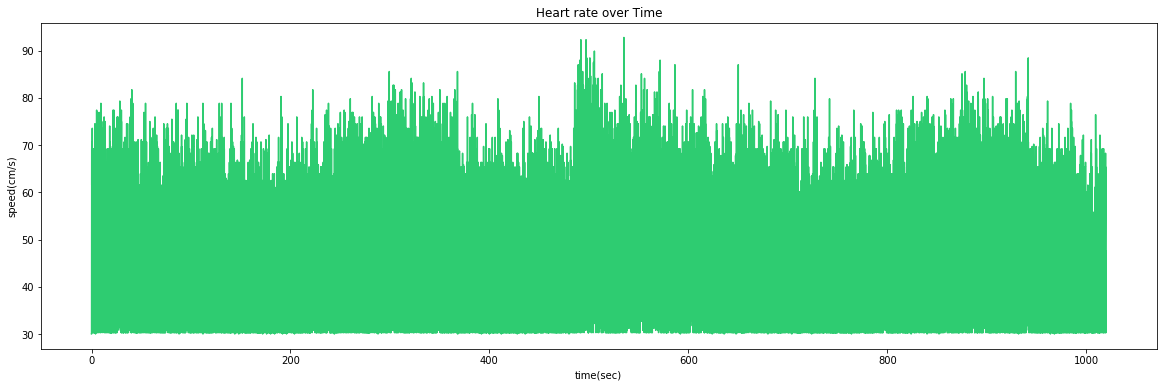

In [16]:
## subject 01

graph_01 = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray/01_rawdata_yarray.npy')
file_name = "01_rawdata_graph"

visualize(graph_01, file_name)

## peak finding

In [125]:
import peakutils

In [163]:
def peakfinding(y_axis, num):
    
    x_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_xarray/01_rawdata_xarray.npy')          # x축은 모두 동일
    
    x_arr = np.array(x_axis)
    y_arr = np.array(y_axis)
    
    index = peakutils.indexes(y_arr, thres=0.1, min_dist=3)
    
    peak = y_arr[index]
    index = x_arr[index]
    
    np.save('D:/kist_storage/Ultrasound Imaging Processing/peak_xarray/%s_peak_xarray' %num, index)
    np.save('D:/kist_storage/Ultrasound Imaging Processing/peak_yarray/%s_peak_yarray' %num, peak)
        
    #plt.figure(figsize = (20, 6))
    #plt.plot(x_axis, y_axis, color="#2ECC71")
    #plt.plot(index, peak, 'o', color='m')
    #plt.title('Heart rate over Time')
    #plt.xlabel('time(sec)')
    #plt.ylabel('speed(cm/s)')
    
    file_path = "D:/kist_storage/Ultrasound Imaging Processing/peak_graph/"+num+"_peak_graph.html"

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_axis, y=y_axis, name='original', line=dict(color='#2ECC71', width=1)))
    fig.add_trace(go.Scatter(x=index, y=peak, name='based on peak', mode='markers'))
    fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 20))
    fig.write_html(file_path)

In [164]:
path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list = file_list[0:1]
file_list

['01_rawdata_yarray.npy']

In [165]:
# 29분짜리

path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list = file_list[0:1]

for i in file_list:
    
    path2 = path1 + "/" + i
    y_axis = np.load(path2)
    
    num = i[:2]
    
    peakfinding(y_axis, num)

In [28]:
# subject 2,13,26,29

path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list2 = []
list = [1, 11, 23, 25]

for i in range(len(list)):
    file_list2.append(file_list[list[i]])

file_list2

for i in file_list2:
    
    path2 = path1 + "/" + i
    y_axis = np.load(path2)
    
    num = i[:2]
    
    peakfinding(y_axis, num)

In [45]:
## subject 30~37

path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list = file_list[29:]

for i in file_list:
    
    path2 = path1 + "/" + i
    y_axis = np.load(path2)
    
    num = i[:2]
    
    peakfinding(y_axis, num)

In [30]:
## subject 39~50

path1 = "D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray"
file_list = os.listdir(path1)
file_list = file_list[35:]

for i in file_list:
    
    path2 = path1 + "/" + i
    y_axis = np.load(path2)
    
    num = i[:2]
    
    peakfinding(y_axis, num)

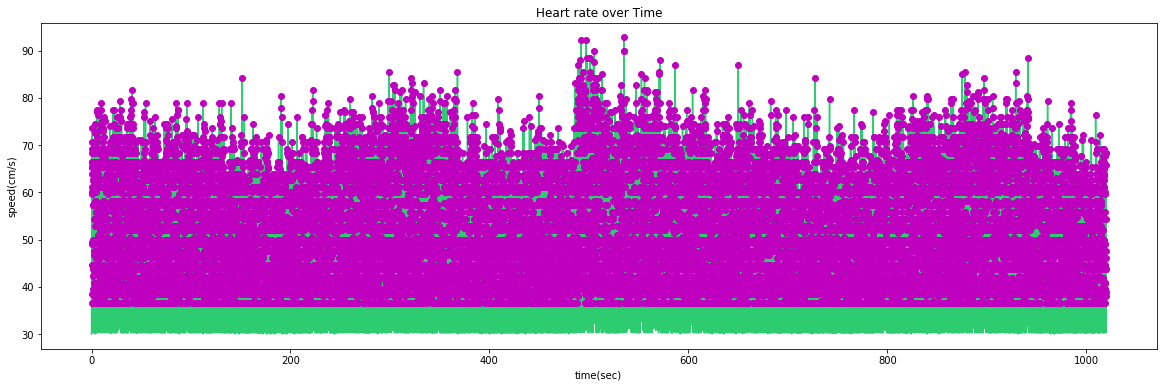

In [72]:
## subject 01

y_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray/01_rawdata_yarray.npy')
num = "01"

peakfinding(y_axis, num)

## smoothing

In [166]:
from scipy.interpolate import make_interp_spline

def smoothing(index_path, peak_path, num):

    data = np.load(index_path)
    value = np.load(peak_path) 
    
    x_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_xarray/01_rawdata_xarray.npy')
    y_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray/'+num+'_rawdata_yarray.npy')

    data_smooth = np.linspace(data[0], data[len(data)-1], len(x_axis)) 
    spl = make_interp_spline(data, value, k=3)
    value_smooth = spl(data_smooth)
    
    for i in range(len(data_smooth)):
    
        if value_smooth[i] > y_axis.max():
            value_smooth[i] = y_axis[int(data_smooth[i])]
        
        if value_smooth[i] < y_axis.min():
            value_smooth[i] = y_axis[int(data_smooth[i])]

    #plt.figure(figsize = (20, 6))
    #plt.plot(x_axis, y_axis, color='#2ECC71')
    ##plt.plot(data, value, 'o', label='peak', color='magenta')
    #plt.plot(data_smooth, value_smooth, label='spline', color='orange')
    #plt.show()
    
    np.save('D:/kist_storage/Ultrasound Imaging Processing/smoothing_xarray/%s_smoothing_xarray' %num, data_smooth)
    np.save('D:/kist_storage/Ultrasound Imaging Processing/smoothing_yarray/%s_smoothing_yarray' %num, value_smooth)
    
    file_path = "D:/kist_storage/Ultrasound Imaging Processing/smoothing_graph/"+num+"_smoothing_graph.html"

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_axis, y=y_axis, name='original', line=dict(color='#2ECC71', width=1)))
    #fig.add_trace(go.Scatter(x=data, y=value, name='based on peak', mode='markers'))
    fig.add_trace(go.Scatter(x=data_smooth, y=value_smooth, name='smoothing', line=dict(color='magenta', width=1)))
    fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 20))
    fig.write_html(file_path)

In [167]:
path1 = "D:/kist_storage/Ultrasound Imaging Processing/peak_xarray"
file_list1 = os.listdir(path1)
file_list1 = file_list1[0:1]
file_list1

['01_peak_xarray.npy']

In [154]:
xx = np.load("D:/kist_storage/Ultrasound Imaging Processing/smoothing_xarray/01_smoothing_xarray.npy")
len(xx)

264225

In [155]:
xx = np.load("D:/kist_storage/Ultrasound Imaging Processing/smoothing_yarray/01_smoothing_yarray.npy")
len(xx)

264225

In [168]:
## 29분짜리

path1 = "D:/kist_storage/Ultrasound Imaging Processing/peak_xarray"
file_list1 = os.listdir(path1)
file_list1 = file_list1[0:1]

path2 = "D:/kist_storage/Ultrasound Imaging Processing/peak_yarray"
file_list2 = os.listdir(path2)
file_list2 = file_list2[0:1]
    
    
for i in range(len(file_list1)):
    
    index_path = path1 + "/" + file_list1[i]
    peak_path = path2 + "/" + file_list2[i]
    
    num = file_list1[i][:2]
    
    smoothing(index_path, peak_path, num)

In [36]:
## subject 39~50

path1 = "D:/kist_storage/Ultrasound Imaging Processing/peak_xarray"
file_list1 = os.listdir(path1)
file_list1 = file_list1[40:]

path2 = "D:/kist_storage/Ultrasound Imaging Processing/peak_yarray"
file_list2 = os.listdir(path2)
file_list2 = file_list2[40:]
    
    
for i in range(len(file_list1)):
    
    index_path = path1 + "/" + file_list1[i]
    peak_path = path2 + "/" + file_list2[i]
    
    num = file_list1[i][:2]
    
    smoothing(index_path, peak_path, num)

KeyboardInterrupt: 

In [34]:
path2 = "D:/kist_storage/Ultrasound Imaging Processing/peak_yarray"
file_list3 = os.listdir(path2)
file_list4 = []
list = [1, 15, 27, 29]

for i in range(len(list)):
    file_list4.append(file_list3[list[i]])

file_list4

['02_peak_yarray.npy',
 '13_peak_yarray.npy',
 '26_peak_yarray.npy',
 '29_peak_yarray.npy']

In [35]:
# subject 02,13,26,29

path1 = "D:/kist_storage/Ultrasound Imaging Processing/peak_xarray"
file_list1 = os.listdir(path1)
file_list2 = []
list = [1, 15, 27, 29]

for i in range(len(list)):
    file_list2.append(file_list1[list[i]])

file_list2

path2 = "D:/kist_storage/Ultrasound Imaging Processing/peak_yarray"
file_list3 = os.listdir(path2)
file_list4 = []
list = [1, 14, 26, 28]

for i in range(len(list)):
    file_list4.append(file_list3[list[i]])

file_list4
    
    
for i in range(len(file_list2)):
    
    index_path = path1 + "/" + file_list2[i]
    peak_path = path2 + "/" + file_list4[i]
    
    num = file_list2[i][:2]
    
    smoothing(index_path, peak_path, num)


ValueError: x and y are incompatible.

In [17]:
data = np.load("D:/kist_storage/Ultrasound Imaging Processing/peak_xarray/02_peak_xarray.npy")
value = np.load("D:/kist_storage/Ultrasound Imaging Processing/peak_yarray/02_peak_yarray.npy") 
    
x_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_xarray/01_rawdata_xarray.npy')
y_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray/02_rawdata_yarray.npy')

data_smooth = np.linspace(data[0], data[len(data)-1], len(x_axis)) 
spl = make_interp_spline(data, value, k=3)
value_smooth = spl(data_smooth)
    
#print(y_axis.max()) # 118.26923076923077
#print(y_axis.min()) # 30.28846153846154


for i in range(len(data_smooth)):
    
    if value_smooth[i] > y_axis.mean()*2:
        value_smooth[i] = y_axis.mean()*2
        #print('max', value_smooth[i], '->', y_axis[int(data_smooth[i])])
        
    if value_smooth[i] < y_axis.min():
        value_smooth[i] = y_axis.min()
        #print('min', value_smooth[i], '->', y_axis.min())
        
num = "02"
        
np.save('D:/kist_storage/Ultrasound Imaging Processing/smoothing_xarray/%s_smoothing_xarray' %num, data_smooth)
np.save('D:/kist_storage/Ultrasound Imaging Processing/smoothing_yarray/%s_smoothing_yarray' %num, value_smooth)
    
file_path = "D:/kist_storage/Ultrasound Imaging Processing/smoothing_graph/"+num+"_smoothing_graph.html"

fig = go.Figure()
fig.add_trace(go.Scatter(x=x_axis, y=y_axis, name='original', line=dict(color='#2ECC71', width=1)))
#fig.add_trace(go.Scatter(x=data, y=value, name='based on peak', mode='markers'))
fig.add_trace(go.Scatter(x=data_smooth, y=value_smooth, name='smoothing', line=dict(color='magenta', width=1)))
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 20))
fig.write_html(file_path)

In [12]:
data = np.load("D:/kist_storage/Ultrasound Imaging Processing/peak_xarray/05_peak_xarray.npy")
value = np.load("D:/kist_storage/Ultrasound Imaging Processing/peak_yarray/05_peak_yarray.npy") 
    
x_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_xarray/01_rawdata_xarray.npy')
y_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/rawdata_yarray/05_rawdata_yarray.npy')

data_smooth = np.linspace(data[0], data[len(data)-1], len(x_axis)) 
spl = make_interp_spline(data, value, k=3)
value_smooth = spl(data_smooth)
    
#print(y_axis.max()) # 118.26923076923077
#print(y_axis.min()) # 30.28846153846154


for i in range(len(data_smooth)):
    
    if value_smooth[i] > (y_axis.mean()*2):
        value_smooth[i] = y_axis.mean()*2
        #print('max', i ,value_smooth[i], '->', y_axis[i])
        
    if value_smooth[i] < y_axis.min():
        value_smooth[i] = y_axis.min()
        #print('min', value_smooth[i], '->', y_axis.min())

KeyboardInterrupt: 

In [ ]:
for i in range(500):
    print(y_axis05[i])

In [5]:
y_axis05.max()

118.221889772583

In [9]:
y_axis.max()

118.26923076923077

In [22]:
np.percentile(y_axis05, 90)

83.17552889587404

In [28]:
def peakfinding_top(y_axis, num):
    
    x_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/smoothing_xarray/05_smoothing_xarray.npy')          # x축은 모두 동일
    
    x_arr = np.array(x_axis)
    y_arr = np.array(y_axis)
    
    index = peakutils.indexes(y_arr, thres=0.6, min_dist=20)
    
    peak = y_arr[index]
    index = x_arr[index]
    
    np.save('D:/kist_storage/Ultrasound Imaging Processing/peak_xarray/%s_peak_xarray' %num, index)
    np.save('D:/kist_storage/Ultrasound Imaging Processing/peak_yarray/%s_peak_yarray' %num, peak)
        
    plt.figure(figsize = (20, 6))
    plt.plot(x_axis, y_axis, color="#2ECC71")
    #plt.gca().invert_yaxis()
    plt.plot(index, peak, 'o', color='m')
    plt.title('Heart rate over Time')
    plt.xlabel('time(sec)')
    plt.ylabel('speed(cm/s)')
    
    file_path = "D:/kist_storage/Ultrasound Imaging Processing/peak_graph/"+num+"_peak_graph.html"

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_axis, y=y_axis, name='original', line=dict(color='#2ECC71', width=1)))
    fig.add_trace(go.Scatter(x=index, y=peak, name='based on peak', mode='markers'))
    fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 20))
    fig.write_html(file_path)

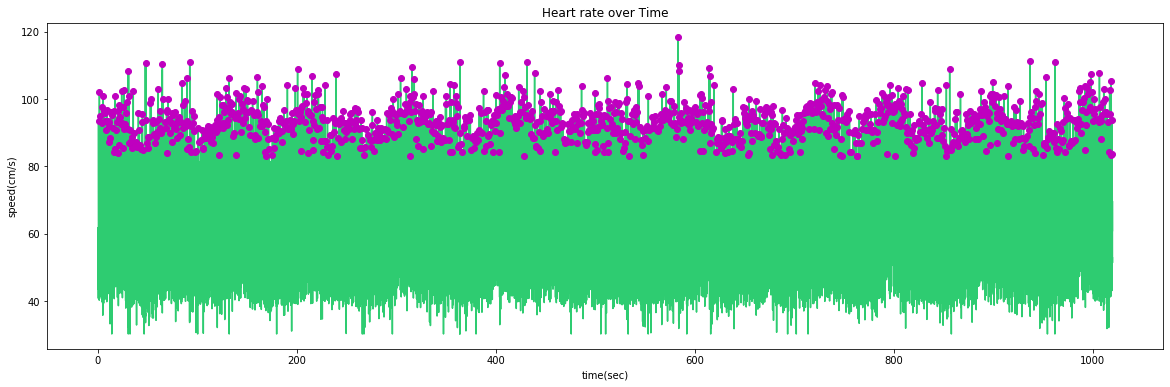

In [29]:
y_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/smoothing_yarray/05_smoothing_yarray.npy')
num = "05new_t"

peakfinding_top(y_axis, num)

In [42]:
def peakfinding_bottom(y_axis, num):
    
    x_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/smoothing_xarray/05_smoothing_xarray.npy')          # x축은 모두 동일
    
    x_arr = np.array(x_axis)
    y_arr = np.array(y_axis)
    
    index = peakutils.indexes(120-y_arr, thres=0.8, min_dist=30)
    
    peak = y_arr[index]
    index = x_arr[index]
    
    np.save('D:/kist_storage/Ultrasound Imaging Processing/peak_xarray/%s_peak_xarray' %num, index)
    np.save('D:/kist_storage/Ultrasound Imaging Processing/peak_yarray/%s_peak_yarray' %num, peak)
        
    plt.figure(figsize = (20, 6))
    plt.plot(x_axis, y_axis, color="#2ECC71")
    #plt.gca().invert_yaxis()
    plt.plot(index, peak, 'o', color='m')
    plt.title('Heart rate over Time')
    plt.xlabel('time(sec)')
    plt.ylabel('speed(cm/s)')
    
    file_path = "D:/kist_storage/Ultrasound Imaging Processing/peak_graph/"+num+"_peak_graph.html"

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_axis, y=y_axis, name='original', line=dict(color='#2ECC71', width=1)))
    fig.add_trace(go.Scatter(x=index, y=peak, name='based on peak', mode='markers'))
    fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 20))
    fig.write_html(file_path)

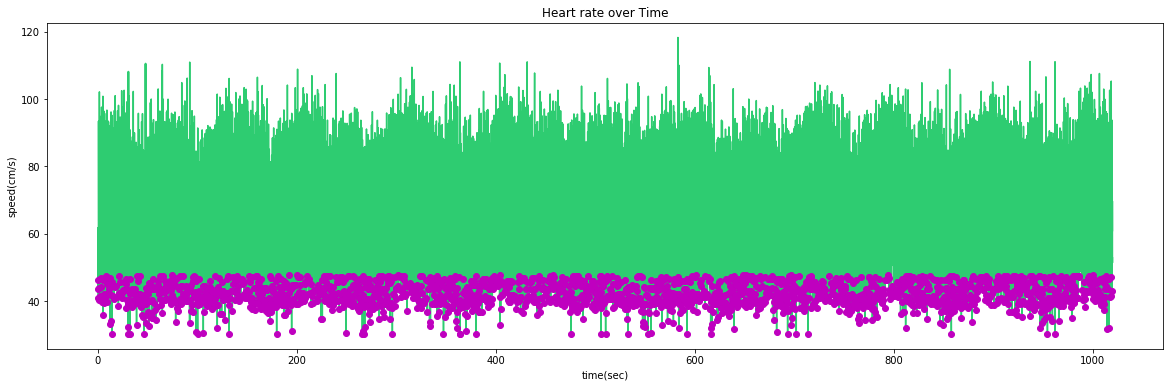

In [43]:
## subject 05

y_axis = np.load('D:/kist_storage/Ultrasound Imaging Processing/smoothing_yarray/05_smoothing_yarray.npy')
num = "05new_b"

peakfinding_bottom(y_axis, num)

In [ ]:
###########################################################################################################################################################
###########################################################################################################################################################

In [46]:
# read video list

path = 'D:/kist_storage/Ultrasound Imaging Processing/video'
file_list = os.listdir(path)
# os.makedirs(path)

file_list.sort()
file_list = file_list[52:53]
file_list

['57.avi']

In [47]:
for i in file_list:
    
    video_file =  "D:/kist_storage/Ultrasound Imaging Processing/video/" + i
    
    shuttleVideo = cv2.VideoCapture(video_file)
    
    num = ''.join( x for x in i if x not in ".avi")
    
    #path = "D:/kist_storage/Ultrasound Imaging Processing/all subjects_data/"+num
    path = "D:/kist_storage/Ultrasound Imaging Processing/frameImages/"+num
    # os.makedirs(path)
    
    while(shuttleVideo.isOpened()):
    
        hasFrame, img_frame = shuttleVideo.read()
    
    
        if shuttleVideo.get(1) == 201:
            break
            
        img_path = path + '/' + '%d.jpg' %shuttleVideo.get(1)
        cv2.imwrite(img_path, img_frame)    
             

In [ ]:
##################################################################################################################################################################